## Problem Statement :  


The Dataset contains Mushrooms sample from 23 Species of gilled mushrooms and  also identified as 3 class, each class of mushroom is identified as definetly edible,definetly poisonous or unknow edibilty which is not recommeded,where poisonous and unknown edibilty is not recommeded and the total unique value in target class column is 2

The Task is to predict the edibility of mushrooms as definetly edible,poisonus
-p
-e

#### Importing Necessary Libraries

In [1]:
# Importing Neccessary libraries for model preparation -Numpy, Pandas, Matplotlib & Seaborn for plots
# 4 algo used from  sklearn library at once - SVC,Random Forest Classifier, Decision tree classifier, KNN
# As the metrics is common for all classification problems so imported common metrics all at once.
#(Confusion Metrics, Accuracy Score, Classification Report) from Sklearn metrics module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [2]:
mushroom = pd.read_csv('mushrooms.csv')
mushroom.head(12)

# class variable is a Target Varible
# Class variable has 2 unique category
# p-poisonous
# e- edibile
# all the values of dataset is not continous it is a categorical types

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


#### Creating Pandas Dataframe for dataset

In [3]:
df = pd.DataFrame(mushroom)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#ObS 
# class variable is a Target Varible
# Class variable has 2 unique category
# p-poisonous
# e- edibile
# all the values of dataset is not continous it is a categorical types

#### Initial Analysis

In [5]:
df.shape

(8124, 23)

In [6]:
df.dtypes
# The variables of dataset is all object type including class variable 
# class variable is a Target Varible
# all the values of dataset is not continous it is object type which is categorical

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
df.info()

# Obs : Shows data type as object with index value 0 to 22 for all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [10]:
df.describe() 

# Obs : all the value in variables is category type 
# - count -> displaying no of rows = 8124 in all variables with no missing value
#- unique -> displaying no of unique value in in each variable i.e 2 for class, 12 for gill color and so on
#- top - > displaying the highest/top categorical value for each class  i.e: e for class, f for gill attachment with highest frequecy of occurence equals 7914

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### Univariate & Bivariate Analysis with count plot, catplot & Box plot(whole dataframe)

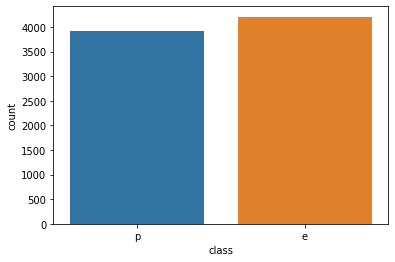

In [12]:
sns.countplot(df['class']);
# edible vlaue is more than poisonous in class variable 
# there is no big difference in poisous class of mushroom with edible class mushroom

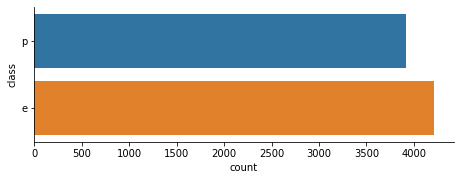

In [13]:
ax = sns.catplot(y="class", kind="count", data=df, height=2.6, aspect=2.5, orient='h')
#Obs with Catplot:
# edible vlaue is more than poisonous in class variable 
# there is no big difference in poisous class of mushroom with edible class mushroom

#### Boxplot representing whole DataFrame

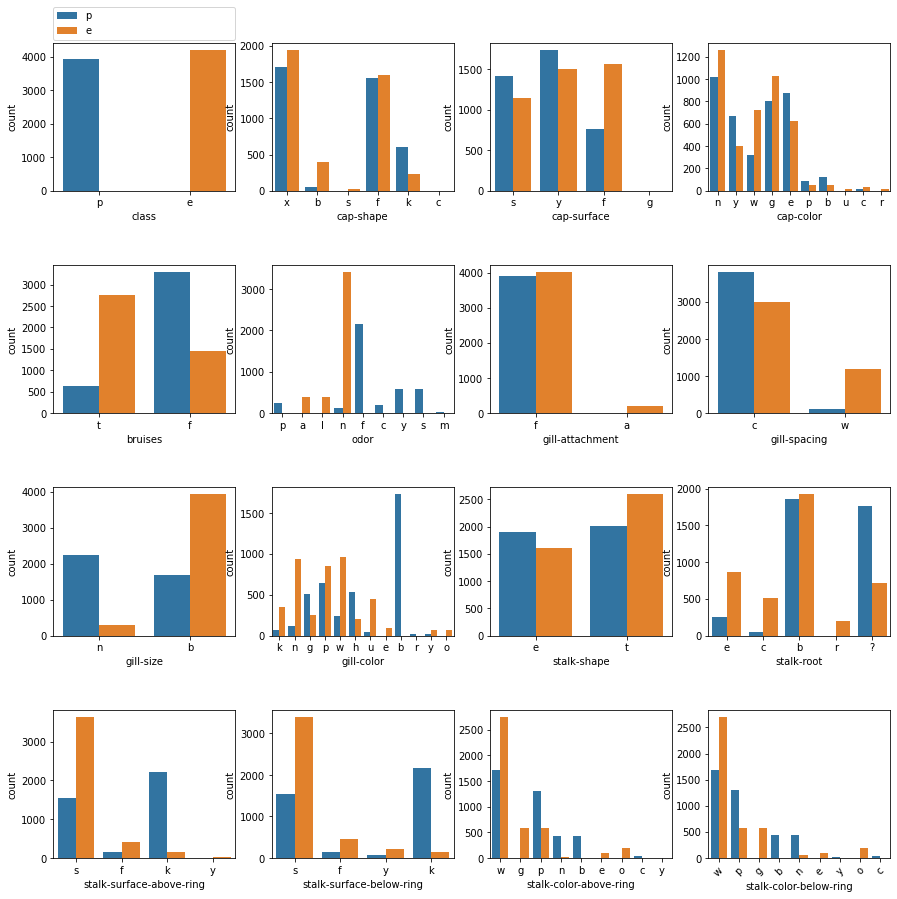

In [14]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=df.iloc[:,i], hue=df["class"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)
    
    
    
#Obs : Boxplot for whole dataframe displaying count value of each variable as poisonous or edible for each unique categorical value of columns
# f category  of gill attachement variable has high edible and poisonous class of mushrooms which is almost same.
# n cat of odor variable has highest edible class of mushroom
# b cat of gill color varible has highest poisonous class of mushroom
# w cat of stalk color above ring & stalk color below ring colums has highest edible class of mushroom
# note : above programming code help is taken from my past projects

#### Converting All object variables to Categorical as Ml Algo works on numeric value

In [15]:
# categorical variable encoding
catvar = df.columns.tolist()
## Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in catvar :
    df[i] = le.fit_transform(df[i])
    
# Obs : as thw whole dataframe has categorical value so label encoder is applied to whole dataframe 
# note : Coding help is taken from my past project

In [16]:
df.head()
# Obs : displaying label encoded value of each categorical value of each column
# 0 & 1 is label encoded for column having two or one categorical value i.e class -> 0 & 1, bruises -> 0 & 1, veil type ->0, gill attachement ->1
# for remaining cat value of a cloumn it is encoded in number from 1-12(as per no of cat value present in a column)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


#### Missing Value

In [17]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [18]:
# though the data type is categorical but still there is no missing value found in dataset.

#### Outliers

<AxesSubplot:>

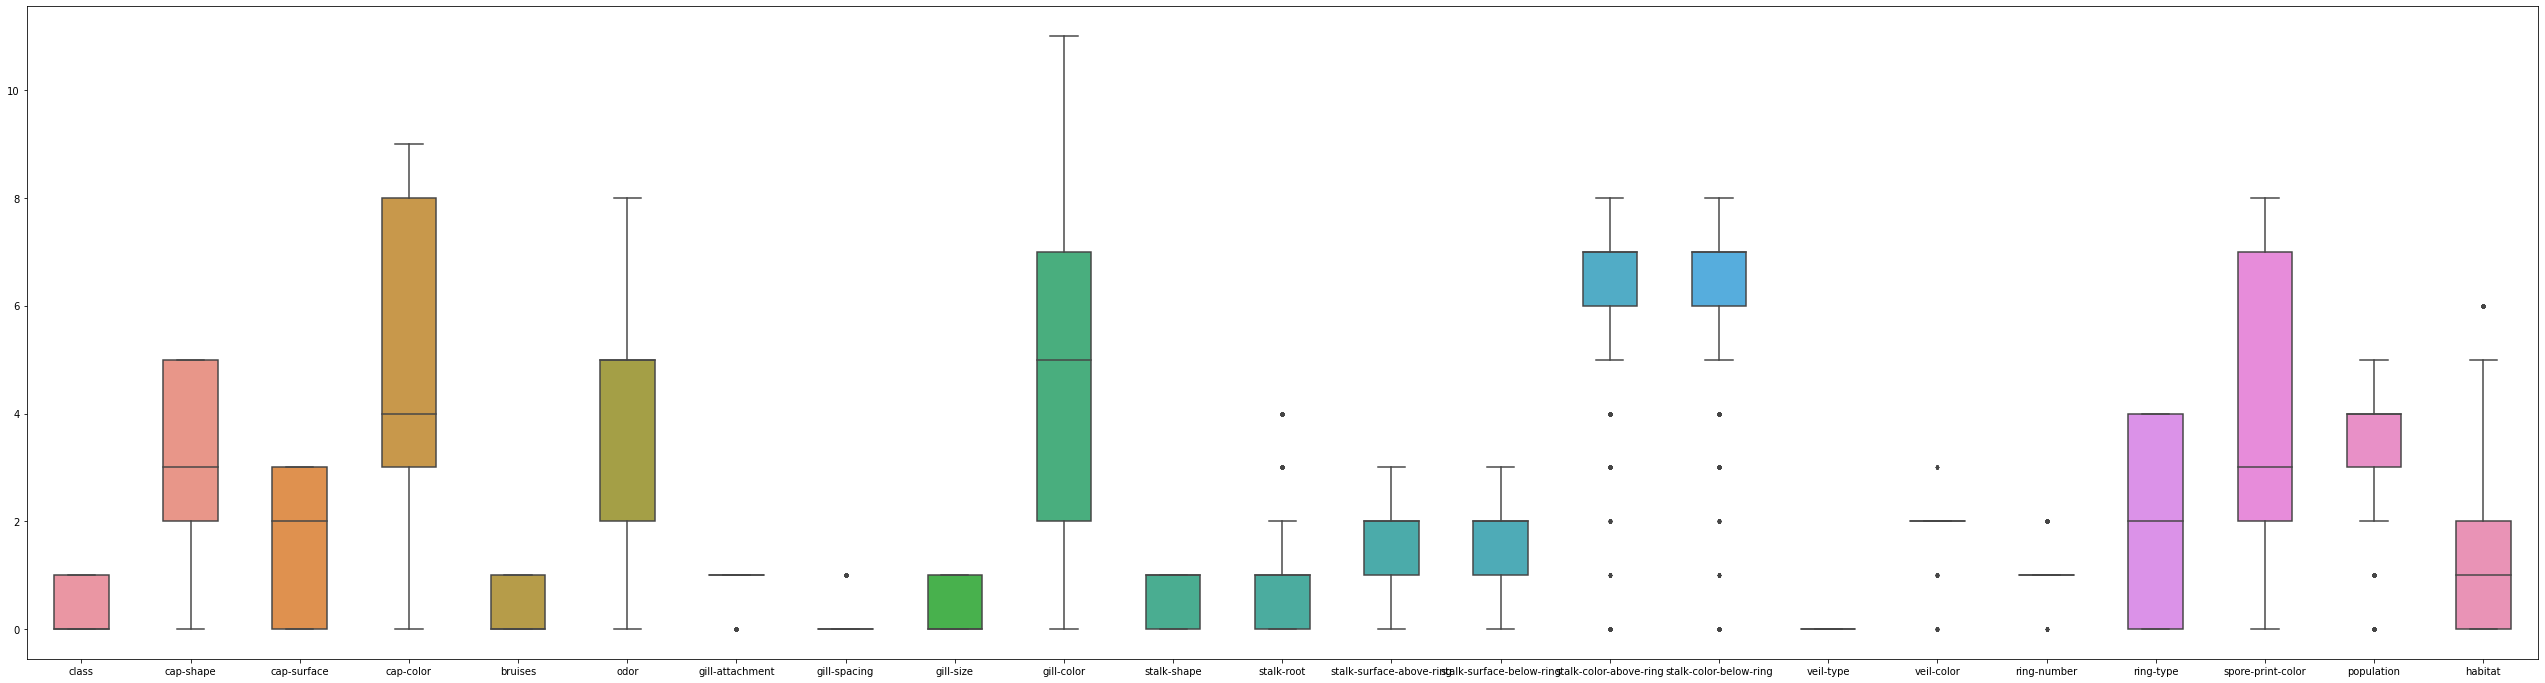

In [19]:
fig, ax =plt.subplots(figsize=(45,12))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

In [ ]:
# The presence of outlier in categorical variable is not contributing to data drift
# as those outliers basically shown below is the count value of categorical column
# The date type is not continous 
#The Box plot show outlier in following columns 
# The outliers is not removed as it shows count value of cat variable after label encoder.

#### Correlation

In [20]:
dfcor=df.corr()
dfcor
# Correlation Matrix displaying value between 0 to 1 which will help heatmap to figure out highly correlated variables with
#-target variable & as well as with each independent variables.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


#### HeatMap

<AxesSubplot:>

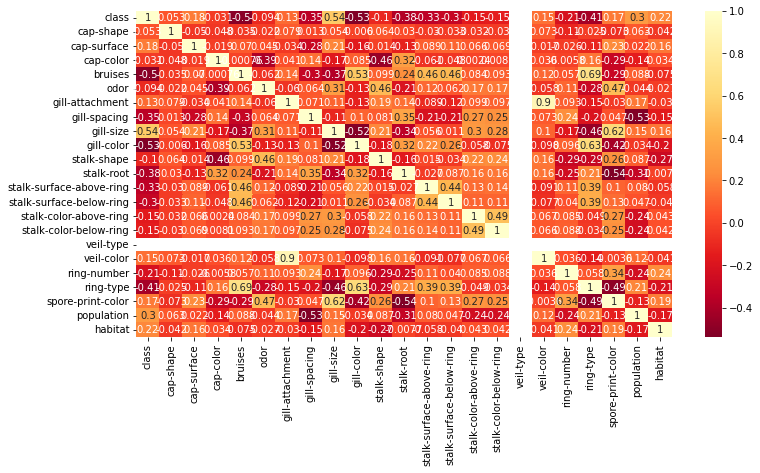

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(dfcor,cmap='YlOrRd_r', annot=True)

In [ ]:
#Ater Label Encoded vell type shows value as 0 which is not much of significance hence will be dropped in x dataframe
# gill size shows some correlation with target variable class with value 0.54
# bruise shows correlation with ring type,stalk surface below ring stalk surface above ring & gill color
# brusie and ring type shows good correlation with highest correlation value in above heatmap = 0.69

#### Skewness

In [22]:
df.skew() 
#  Presence of Skewness in Cat Variables is not so Important as those value represent the count of each unique values.
#  Hence There is no need to perform data normality test and change the data set values to normal.


class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

#### Dividing Dataset in x-> independent variable, y->target variable

In [23]:
x= df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring','veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]
y = df['class']

# Obs :  veil-type  variable excluded as its value is zero & not contrubuting to target variable

In [24]:
x.shape
# Obs : Displaying 8124 rows & 21 Columns in x-> dataset object

(8124, 21)

In [25]:
y.shape
# Displaying 8124 rows only in Target Variable->y

(8124,)

In [26]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)  
    
# Obs : Above code is predicting accuracy for 200 random state with decision tree classifier which is 100% for almost all random state.

100.0 at random_state 0
100.0 at random_state 1
100.0 at random_state 2
100.0 at random_state 3
100.0 at random_state 4
100.0 at random_state 5
100.0 at random_state 6
100.0 at random_state 7
100.0 at random_state 8
100.0 at random_state 9
100.0 at random_state 10
100.0 at random_state 11
100.0 at random_state 12
100.0 at random_state 13
100.0 at random_state 14
100.0 at random_state 15
100.0 at random_state 16
100.0 at random_state 17
100.0 at random_state 18
100.0 at random_state 19
100.0 at random_state 20
100.0 at random_state 21
100.0 at random_state 22
100.0 at random_state 23
100.0 at random_state 24
100.0 at random_state 25
100.0 at random_state 26
100.0 at random_state 27
100.0 at random_state 28
100.0 at random_state 29
100.0 at random_state 30
100.0 at random_state 31
100.0 at random_state 32
100.0 at random_state 33
100.0 at random_state 34
100.0 at random_state 35
100.0 at random_state 36
100.0 at random_state 37
100.0 at random_state 38
100.0 at random_state 39
100.0 at r

In [27]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

# Obs : Above code is used to select best random sate out of 200 random state which is 1 with accuracy of 100%

Best accuracy is  1.0  on Random_state  1


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 2)

# Dataset is divided in train & test with random state value of 2 
# I have used random state value of 2 as accuracy is same for random state 1 & random state 2

In [29]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

# Obs Decision Tree Classifier is giving 100% Accuracy on y test data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       1.00      1.00      1.00      1140

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [30]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

# Obs : Random forest classifier is also giving 100% acc on y test data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       1.00      1.00      1.00      1140

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [31]:
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

# Support vector classifier is giving 99% acc on y test data

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1298
           1       1.00      0.97      0.99      1140

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [32]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

# Obs KNN is giving 99% accuracy on y test data

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1298
           1       1.00      0.97      0.99      1140

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [38]:
from sklearn.model_selection import cross_val_score 
# Importing Cross validation score from sklearn 

In [47]:
print(cross_val_score(DTC,x,y,cv=5).mean())

# Decision Tree Classifier CV Score is 0.96

0.960113982569155


In [40]:
print(cross_val_score(RFC,x,y,cv=5).mean())

# RandomForestClasifier CV Score = 0.89

0.8902903372489579


In [42]:
print(cross_val_score(SV,x,y,cv=5).mean())

#Obs :
# SV CV Score is 0.84

0.8420306934444864


In [44]:
print(cross_val_score(knn,x,y,cv=5).mean())

#Obs : Knn CV Score = 0.88

0.8808163698370594


In [48]:
#DTC = 100-96 = 4
#RFC = 100-89 = 11
#SV = 99-84 = 15
#knn = 99-88 = 11

#Obs : 
# So as per above best model is selcted which has least value between accuracy of the model and cv  score the one which is least will chose as the best model
# So out of four model DTC has the least value of 4 hence we will chose DTC as our Best Model


### Hyperparameter Tuning for Best Model DTC

In [49]:
from sklearn.model_selection import GridSearchCV # Importing Gridsearch CV from sklearn

In [50]:
import numpy as np
parameter = {'max_depth' : np.arange(2,10),
            'criterion':['gini','entropy'],
            'splitter' : ['best', 'random'],
            'max_features' : ['auto','sqrt','log2']}

# Obs :  Configuring Various hyperparameter in order to select best out of those value.

In [51]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

#Obs : Applying Gridsearch to best model decision tree classifier 

In [52]:
GCV.fit(x_train,y_train)
# Grid search CV applied to the Training Dataset 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [53]:
GCV.best_params_
# Best Parameter is selected from grid search CV which is 
#'criterion': 'gini','max_depth': 9,'max_features': 'sqrt','splitter': 'best'

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [54]:
Final_mod = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,max_features='sqrt',splitter='best')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

# Obs :  Best Parameter is applied through Gridsearch CV on Best Model Decisiontree classifier giving accuracy of 99.26

99.2616899097621


### ROC Curve

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Obs : Importing roc_curve & ruc_auc_score metrics from sklearn.

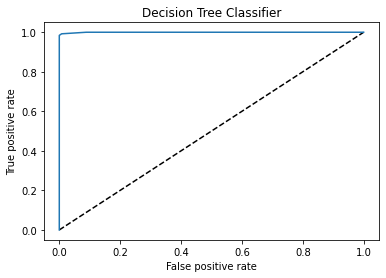

0.9921052631578947

In [57]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_mod.predict(x_test))
auc_score

OBS : ROC Curve : Classifiers that give curves closer to top left corner indicates that model will give better performance & if the
curve comming closer to 45 degree diagonal of the ROC space the less accurate the model will give, so in above case the curve is 
closer to top left corner hence I believe the model will give better performance.

In [58]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

# Obs :  Exporting ML Model as .pkl file with joblib library

['FinalModel.pkl']